# Total Variation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

## implementation of total variation model

In [2]:
import sys
sys.path += ['..', '../primaldual']

from total_variation import TotalVariation

### try the implemented total variation model

load a image

In [3]:
img = cv2.cvtColor(
    cv2.resize(cv2.imread('../data/insects.jpeg', True), None, fx=0.25, fy=0.25),
    cv2.COLOR_BGR2RGB
) / 255.
coef = np.array([1, -1])
lambd = 0.5

In [4]:
print(img.shape, np.prod(img.shape[:2]))

(756, 1008, 3) 762048


In [5]:
%%prun
tv = TotalVariation(lambd = lambd, saturation = True, extended_output = True, max_iter = 1000, coef = coef)
smoothed = np.empty(img.shape)
smoothed[:,:,0] = tv.transform(img[:,:,0])

100%|██████████| 1000/1000 [01:05<00:00, 11.43it/s]

objective function

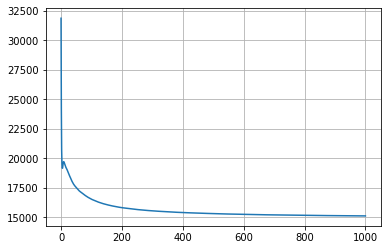

In [6]:
plt.plot(tv.obj)
plt.grid(True)

In [7]:
%%time
tv = TotalVariation(lambd = lambd, saturation = True, extended_output = False, max_iter = 1000, coef = coef)
smoothed[:,:,1] = tv.transform(img[:,:,1])
smoothed[:,:,2] = tv.transform(img[:,:,2])

100%|██████████| 1000/1000 [00:44<00:00, 22.61it/s]

CPU times: user 1min 13s, sys: 20.4 s, total: 1min 33s
Wall time: 1min 34s


result

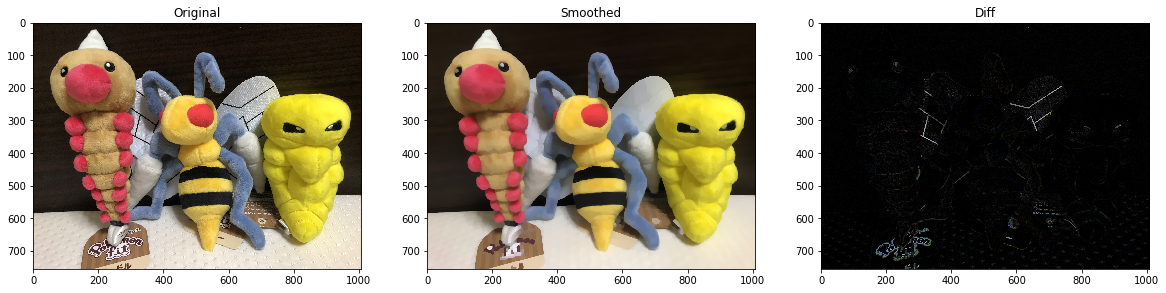

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.grid(False)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(smoothed)
plt.grid(False)
plt.title('Smoothed')
plt.subplot(1,3,3)
plt.imshow(np.abs(img - smoothed))
plt.grid(False)
plt.title('Diff')
plt.savefig('../data/smoothed_insects.png')
plt.show()

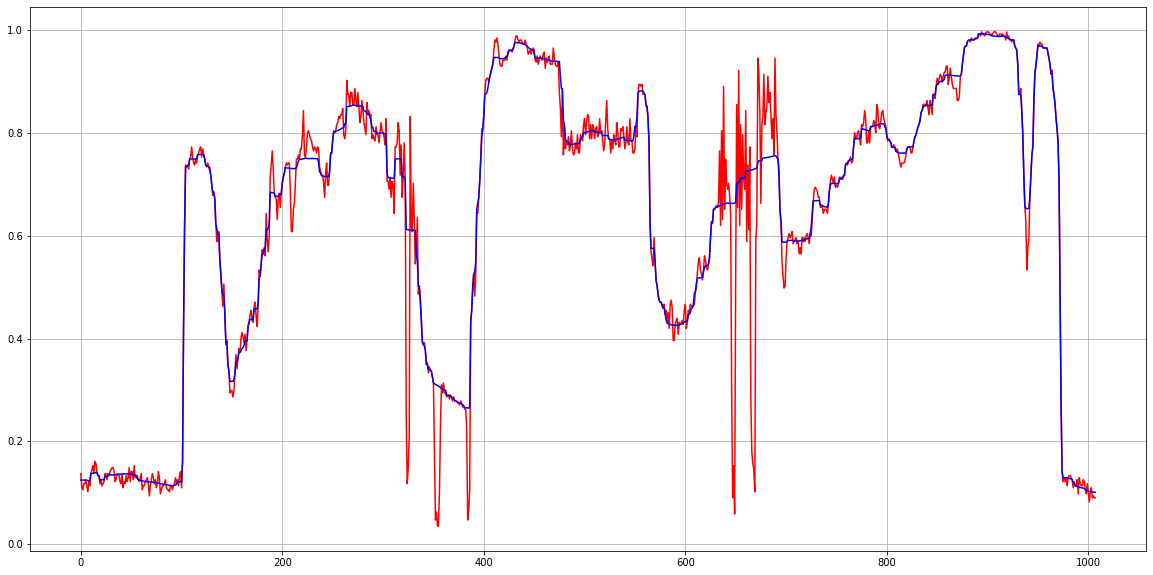

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(img[:,:,0][300], 'r')
plt.plot(smoothed[:,:,0][300], 'b')
plt.grid()